Using SVD for latent features

In [14]:
import pandas as pd
import numpy as np
from scipy.sparse.linalg import svds
from scipy.sparse import csr_matrix
from sklearn.metrics.pairwise import cosine_similarity

# Caricamento dei dataset
movies = pd.read_csv('ml-latest-small/ml-latest-small/movies.csv')
ratings = pd.read_csv('ml-latest-small/ml-latest-small/ratings.csv')

# Esplorazione dei dataset
print("Movies dataset:\n", movies.head())
print("Ratings dataset:\n", ratings.head())


Movies dataset:
    movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  
Ratings dataset:
    userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931


In [15]:
# Creazione della matrice utente-film
user_movie_matrix = ratings.pivot(index='userId', columns='movieId', values='rating').fillna(0)
print("User-movie matrix:\n", user_movie_matrix.head())


User-movie matrix:
 movieId  1       2       3       4       5       6       7       8       \
userId                                                                    
1           4.0     0.0     4.0     0.0     0.0     4.0     0.0     0.0   
2           0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3           0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4           0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
5           4.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

movieId  9       10      ...  193565  193567  193571  193573  193579  193581  \
userId                   ...                                                   
1           0.0     0.0  ...     0.0     0.0     0.0     0.0     0.0     0.0   
2           0.0     0.0  ...     0.0     0.0     0.0     0.0     0.0     0.0   
3           0.0     0.0  ...     0.0     0.0     0.0     0.0     0.0     0.0   
4           0.0     0.0  ...     0.0     0.0     0.0  

In [16]:
# Conversione in matrice sparsa
sparse_user_movie_matrix = csr_matrix(user_movie_matrix.values)
print("Sparse user-movie matrix:\n", sparse_user_movie_matrix)

Sparse user-movie matrix:
   (0, 0)	4.0
  (0, 2)	4.0
  (0, 5)	4.0
  (0, 43)	5.0
  (0, 46)	5.0
  (0, 62)	3.0
  (0, 89)	5.0
  (0, 97)	4.0
  (0, 124)	5.0
  (0, 130)	5.0
  (0, 136)	5.0
  (0, 184)	5.0
  (0, 190)	3.0
  (0, 197)	5.0
  (0, 201)	4.0
  (0, 224)	5.0
  (0, 257)	3.0
  (0, 275)	3.0
  (0, 291)	5.0
  (0, 307)	4.0
  (0, 314)	4.0
  (0, 320)	5.0
  (0, 325)	4.0
  (0, 367)	3.0
  (0, 384)	4.0
  :	:
  (609, 9238)	5.0
  (609, 9246)	4.5
  (609, 9256)	4.0
  (609, 9268)	5.0
  (609, 9274)	3.5
  (609, 9279)	3.5
  (609, 9282)	3.0
  (609, 9288)	3.0
  (609, 9304)	3.0
  (609, 9307)	2.5
  (609, 9312)	4.5
  (609, 9317)	3.0
  (609, 9324)	3.0
  (609, 9339)	4.0
  (609, 9341)	4.0
  (609, 9348)	3.5
  (609, 9371)	3.5
  (609, 9372)	3.5
  (609, 9374)	5.0
  (609, 9415)	4.0
  (609, 9416)	4.0
  (609, 9443)	5.0
  (609, 9444)	5.0
  (609, 9445)	5.0
  (609, 9485)	3.0


In [17]:
# Applicazione di SVD
U, sigma, Vt = svds(sparse_user_movie_matrix, k=20)  # k: numero di feature latenti

In [21]:
#printa la matrice U (utenti-feature latenti) magari solo i primi dieci campioni
print("U:\n", U[:10])

U:
 [[ 3.80856647e-02 -3.48781510e-02 -3.14980600e-02  5.03411112e-02
   4.45777334e-02 -6.93985012e-02  1.34632627e-02  3.07450731e-02
  -1.96212008e-02  5.27394757e-02  2.25040391e-02 -3.29776741e-02
   8.20930647e-03 -5.51149007e-03 -5.25068858e-02 -9.21447006e-02
  -8.29373257e-04  1.08974491e-02  6.16738477e-02 -5.55541517e-02]
 [-3.64630569e-03 -5.79092650e-03  1.02453157e-02 -4.97282158e-03
  -5.90237729e-03 -1.13115255e-02 -2.35836149e-02  7.59256904e-03
  -1.61018620e-02  7.17582425e-03  1.52560089e-02 -2.04336322e-02
  -7.55487339e-03 -6.55564775e-03  1.54519335e-02  1.49426062e-03
   1.33420126e-02  4.42345417e-03 -1.77377186e-02 -5.86629527e-03]
 [-2.60861067e-03 -7.52853859e-03 -4.38670147e-03  1.06349446e-03
   7.42239581e-03 -1.07699175e-03 -5.58630585e-03  3.34625395e-03
   2.02981274e-03  4.20763680e-03 -7.21205663e-04  2.15794660e-03
  -4.27350578e-04 -1.48924967e-03  2.05930866e-04 -7.38944668e-03
  -1.96067936e-03 -1.71517331e-03  2.06861278e-03 -1.35323055e-03]
 [-

In [ ]:
# # Visualizzazione della distribuzione delle feature latenti degli utenti
# plt.figure(figsize=(10, 6))
# for i in range(min(5, U.shape[1])):  # Mostra le prime 5 feature latenti
#     plt.hist(U[:, i], bins=30, alpha=0.6, label=f'Feature {i+1}')
# plt.title('Distribuzione delle feature latenti degli utenti (U)')
# plt.xlabel('Valori delle feature latenti')
# plt.ylabel('Frequenza')
# plt.legend()
# plt.show()

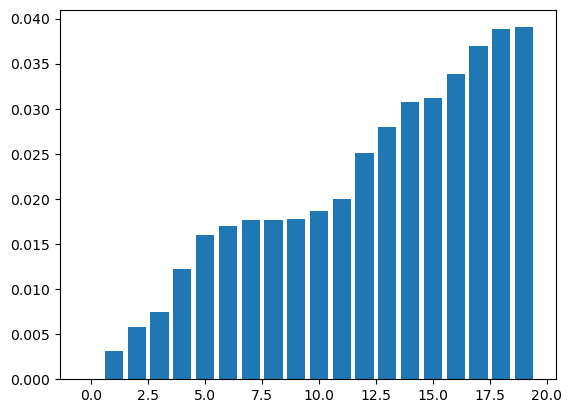

In [28]:
utente = 2
#printare barplot dell'utente 0 della matrice U.
#scalare prima i valori della matrice U per renderli tutti positivi
#e poi fare il barplot per l'utente 0
import matplotlib.pyplot as plt
#ordina la matrice U in modo crescente
U = np.sort(U)
U_scaled = U[utente] - U[utente].min()
# U_scaled /= U_scaled.max()
plt.bar(range(20), U_scaled)
plt.show()


In [18]:
# Sigma restituito come array diagonale, lo convertiamo in una matrice diagonale
sigma = np.diag(sigma)

# Ricostruzione approssimata della matrice utente-film
approx_user_movie_matrix = np.dot(np.dot(U, sigma), Vt)

# Normalizzazione per riportare i valori alle scale originali (facoltativo)
user_movie_predictions = pd.DataFrame(approx_user_movie_matrix, columns=user_movie_matrix.columns)

# Output della matrice predetta
print("Matrice predetta:\n", user_movie_predictions.head())

Matrice predetta:
 movieId    1         2         3         4         5         6         7       \
0        2.290336  1.460203  1.033507 -0.061334 -0.002275  1.243261  0.029650   
1        0.038570  0.015272  0.016968  0.002944  0.019201 -0.005821 -0.025436   
2       -0.015220  0.049067  0.047202 -0.004936 -0.035349  0.052758 -0.012911   
3        2.238621  0.060011  0.039384  0.066455  0.221806  0.487591  0.318594   
4        1.358363  0.970071  0.340939  0.121053  0.479936  0.628346  0.504583   

movieId    8         9         10      ...    193565    193567    193571  \
0        0.056161  0.036220  1.442856  ... -0.008584 -0.007358 -0.009810   
1        0.000918  0.010531 -0.117149  ...  0.010662  0.009139  0.012186   
2        0.010422 -0.002532 -0.014094  ...  0.000029  0.000025  0.000033   
3       -0.057422  0.016371  0.234273  ...  0.002029  0.001739  0.002319   
4        0.136293  0.040721  1.122003  ...  0.000348  0.000299  0.000398   

movieId    193573    193579    193581

In [19]:
# Mappatura movieId -> genres
movie_genres = movies.set_index('movieId')['genres']

# Calcolo della similarità coseno tra le feature latenti dei film
movie_features = Vt.T  # Feature latenti dei film
cosine_sim = cosine_similarity(movie_features)

# Creazione di una mappatura movieId -> indice nella matrice
movie_id_to_index = {movie_id: idx for idx, movie_id in enumerate(user_movie_matrix.columns)}

# Verifica della correlazione tra similarità e generi
similar_movies = {}
for movie_id, genre in movie_genres.items():
    if movie_id in movie_id_to_index:
        idx = movie_id_to_index[movie_id]
        similar_indices = np.argsort(-cosine_sim[idx])[:10]  # Top 10 simili
        similar_movies[movie_id] = [(user_movie_matrix.columns[sim_idx], movie_genres.get(user_movie_matrix.columns[sim_idx], "Unknown")) for sim_idx in similar_indices if user_movie_matrix.columns[sim_idx] in movie_genres.index]

# Output dei risultati
print("Film simili in base alle feature latenti:\n")
for movie_id, similars in list(similar_movies.items())[:5]:  # Mostra i primi 5 risultati
    print(f"Film: {movies.loc[movies['movieId'] == movie_id, 'title'].values[0]} ({movie_genres[movie_id]})")
    for sim_movie_id, sim_genre in similars:
        print(f"  Simile a: {movies.loc[movies['movieId'] == sim_movie_id, 'title'].values[0]} ({sim_genre})")
    print()

Film simili in base alle feature latenti:

Film: Toy Story (1995) (Adventure|Animation|Children|Comedy|Fantasy)
  Simile a: Toy Story (1995) (Adventure|Animation|Children|Comedy|Fantasy)
  Simile a: Aladdin (1992) (Adventure|Animation|Children|Comedy|Musical)
  Simile a: Home Alone (1990) (Children|Comedy)
  Simile a: Willy Wonka & the Chocolate Factory (1971) (Children|Comedy|Fantasy|Musical)
  Simile a: Groundhog Day (1993) (Comedy|Fantasy|Romance)
  Simile a: Princess Bride, The (1987) (Action|Adventure|Comedy|Fantasy|Romance)
  Simile a: Babe (1995) (Children|Drama)
  Simile a: Apollo 13 (1995) (Adventure|Drama|IMAX)
  Simile a: Back to the Future (1985) (Adventure|Comedy|Sci-Fi)
  Simile a: Jurassic Park (1993) (Action|Adventure|Sci-Fi|Thriller)

Film: Jumanji (1995) (Adventure|Children|Fantasy)
  Simile a: Jumanji (1995) (Adventure|Children|Fantasy)
  Simile a: Lion King, The (1994) (Adventure|Animation|Children|Drama|Musical|IMAX)
  Simile a: Far From Home: The Adventures of Yel